In [480]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [481]:
n = 10
A = np.array([[(i + j + 1) for i in range(n)] for j in range(n)])
#A = np.random.rand(n,n)
#A = np.eye(n)
print(A)
b = np.ones(n)
x0 = np.zeros(n)
a = 1.0 / np.amax(np.linalg.eigh(A.T @ A) [0]) 
print('hk =', hk)
vt = np.zeros(n)
T = 5000
hk = 1

func = lambda x: 0.5 * np.linalg.norm(A @ x - b)**2
grad = lambda x: A.T @ (A @ x - b)

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]
 [ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]
 [10 11 12 13 14 15 16 17 18 19]]
hk = 1


In [482]:
def show(data, namefile, legends=[],  colors=[], title="", xlabel="", ylabel=""):
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    colors = iter(colors if colors else ["b", "g", "r", "go:"])
    plt.legend(tuple([plt.plot(el, next(colors)) for el in data]), tuple(legends), loc = 'best')
    plt.grid()
    plt.savefig(f'{namefile}.png', format = 'png')

In [483]:
def adagrad(xk, T, grad, func, n, a=0.01, hk=0.001):
    res = [func(xk)]
    a0 = a
    vt = 0
    for i in range (1, T + 1):
        vt = vt + grad(xk) * grad(xk)
        At = np.eye (n) * vt**0.5 + hk * np.eye(n)
        xk = xk - a * np.linalg.inv(At) @ grad(xk)
        #a = a0 / (i**0.34)
        res.append(func(xk))
    return xk, res   

In [484]:
xk, res = adagrad(x0, T, grad, func, n)

1.6094379124341005
-0.885541014692133
-0.9800332276979226


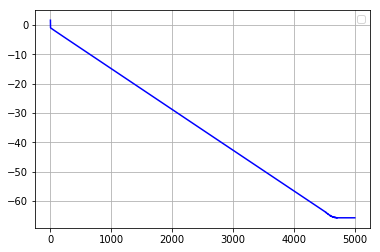

In [485]:
show([np.log(res)], namefile = "graph") 
print(np.log(res[0]))
print(np.log(res[1]))
print(np.log(res[2]))